<a href="https://colab.research.google.com/github/mwahaha-umich/ACLUFinalProject/blob/main/ACLU_Project_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
from os import listdir
from os.path import isfile, join
from pathlib import Path
import requests

if 'google.colab' in str(get_ipython()):
  #We keep changing the different paths, so I'm going to check if various configurations exist.
  if (os.path.isdir("/content/drive/MyDrive/Shared with me/content/drive/My Drive/Shared with me/ACLU/")):
    GoogleDriveBase = "/content/drive/MyDrive/Shared with me/content/drive/My Drive/Shared with me/" #Anupriya
    WorkingDirectory = GoogleDriveBase + 'ACLU/' #Anupriya
  elif (os.path.isdir("/content/drive/MyDrive/Projects/ACLU")):
    GoogleDriveBase = "/content/drive/MyDrive/" #Mackenzie
    WorkingDirectory = GoogleDriveBase + "Projects/ACLU/" #Mackenzie
  else:  
    if (os.path.isdir("/content/drive/My Drive/Projects/ACLU/")):
      GoogleDriveBase = "/content/drive/My Drive/" #Kyle
      WorkingDirectory = GoogleDriveBase + "Projects/ACLU/" #Kyle
else: # We're not running in Google Colab, which means we're probably running locally. 
  #Put code here for local copies of the files
  GoogleDriveBase = "" 
  WorkingDirectory = GoogleDriveBase + "" 


WorkingFiles = WorkingDirectory + 'WorkingFiles/'
BasePickeDrive = GoogleDriveBase + WorkingDirectory + "Pickle/"


#Make the necessary folders for the script to run.
ListOfAllRequiredDirectories = [WorkingDirectory + 'Pickle', 
                          WorkingDirectory + 'WorkingFiles',
                          WorkingDirectory + 'AdditionalData',
                          WorkingDirectory + 'ACLUData']

for folder in ListOfAllRequiredDirectories:
  RunningPath = GoogleDriveBase + folder + "/"
  Path(RunningPath).mkdir(parents=True, exist_ok=True)

#Import necessary libraries and data

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
!pip install kmodes
from kmodes.kmodes import KModes
from sklearn import preprocessing
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dfMerged = pd.read_csv(WorkingFiles + "dfMergedUpdated.csv")
dfMerged = dfMerged.fillna('')
dfMerged = dfMerged[['Sex','RaceName','MaritalStatus','Party','mZip5',
                     'PresPrimary08','PresPrimary08Party','General08',
                     'PresPrimary12','PresPrimary12Party','General12',
                     'PresPrimary16','PresPrimary16Party','General16',
                     'PresPrimary20','PresPrimary20Party','General20']]
dfMerged['mZip5'] = dfMerged.mZip5.astype(str)
dfMerged = dfMerged.sample(n=2000000, random_state=42)
dfMerged.to_csv(WorkingFiles + "dfVotersSample.csv", encoding='utf-8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,4,8,9,11,13,14,15,18,19,23,24,26,27,28,29,30,31,37,39,41,42,43,44,46,47,49,50,51,53,54,55,60,61,62,63,64,65,66,68,69,70,72,73,76,81,82,84,85,87,88,90,93,94,95,97) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#K-modes implementation

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11557769.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 11557769.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 11557769.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 11557769.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 11557769.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 623313, cost: 9793698.0
Run 1, iteration: 2/100, moves: 287928, cost: 9704967.0
Run 1, iteration: 3/100, moves: 45915, cost: 9704967.0
Init: initializing centroids
Init: initializing clusters
Starting itera

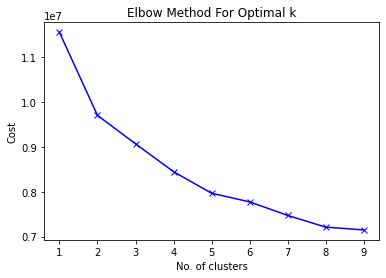

In [ ]:
# Elbow curve to find optimal K
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(dfMerged)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

## Try it with 5 clusters

In [ ]:
# Building the model with 5 clusters
kmode_5 = KModes(n_clusters=5, init = "random", n_init = 5, verbose=1)
clusters_5 = kmode_5.fit_predict(dfMerged)
clusters_5

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 593722, cost: 8280844.0
Run 1, iteration: 2/100, moves: 9423, cost: 8280844.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 533322, cost: 8285444.0
Run 2, iteration: 2/100, moves: 97280, cost: 8160853.0
Run 2, iteration: 3/100, moves: 93995, cost: 8071048.0
Run 2, iteration: 4/100, moves: 22507, cost: 8071048.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 489982, cost: 8047813.0
Run 3, iteration: 2/100, moves: 20581, cost: 8047813.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 312645, cost: 8469254.0
Run 4, iteration: 2/100, moves: 845, cost: 8469254.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 482237, cost: 812

array([1, 2, 1, ..., 2, 1, 1], dtype=uint16)

In [ ]:
dfMergedClusters_5 = dfMerged.copy()
dfMergedClusters_5.insert(0, "Cluster", clusters_5, True)
dfMergedClusters_5.to_csv(WorkingFiles + "dfClustersFive.csv", encoding='utf-8')
dfMergedClusters_5.head()

,Cluster,Sex,RaceName,MaritalStatus,Party,mZip5,PresPrimary08,PresPrimary08Party,General08,PresPrimary12,PresPrimary12Party,General12,PresPrimary16,PresPrimary16Party,General16,PresPrimary20,PresPrimary20Party,General20
354414,1,F,Black,S,U,48503.0,,,,,,,,,,,,
1797018,2,F,Black,,,49503.0,,,,,,,,,P,,,
225294,1,F,Caucasian,S,U,48910.0,,,,,,,,,,,,
630318,2,M,Black,,U,48238.0,,,,,,,,,P,,,
1947309,2,F,Black,,U,48197.0,,,,,,,,,P,P,,P


###Cluster interpretation

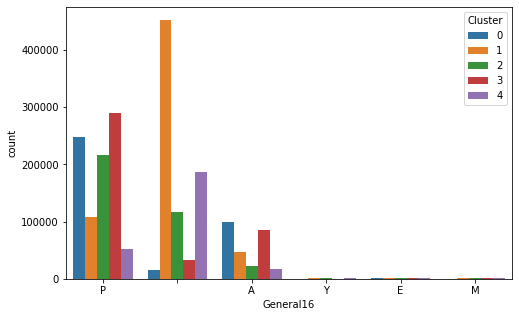

In [ ]:
plt.subplots(figsize = (8,5))
sns.countplot(x=dfMergedClusters_5['General16'],order=dfMergedClusters_5['General16'].value_counts().index,hue=dfMergedClusters_5['Cluster'])
plt.show()

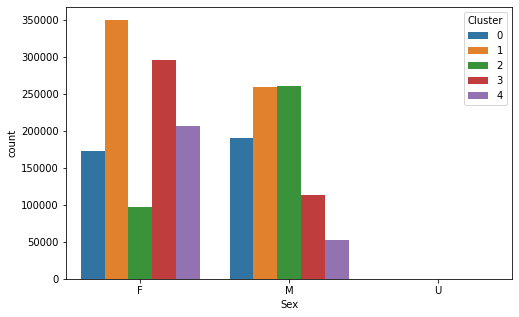

In [ ]:
plt.subplots(figsize = (8,5))
sns.countplot(x=dfMergedClusters_5['Sex'],order=dfMergedClusters_5['Sex'].value_counts().index,hue=dfMergedClusters_5['Cluster'])
plt.show()

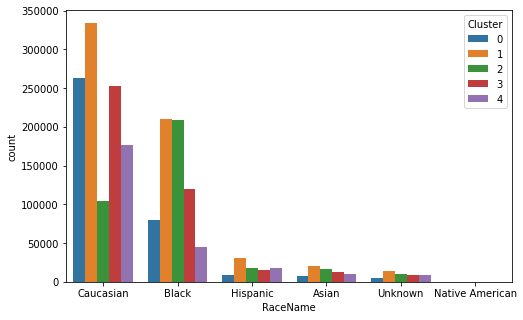

In [ ]:
plt.subplots(figsize = (8,5))
sns.countplot(x=dfMergedClusters_5['RaceName'],order=dfMergedClusters_5['RaceName'].value_counts().index,hue=dfMergedClusters_5['Cluster'])
plt.show()

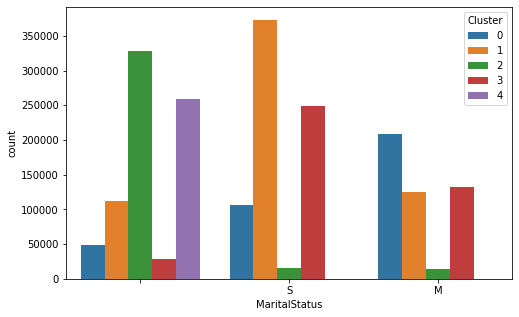

In [ ]:
plt.subplots(figsize = (8,5))
sns.countplot(x=dfMergedClusters_5['MaritalStatus'],order=dfMergedClusters_5['MaritalStatus'].value_counts().index,hue=dfMergedClusters_5['Cluster'])
plt.show()

In [ ]:
print(kmode_5.cluster_centroids_)

[['M' 'Caucasian' 'M' 'U' '48076.0' '' '' 'P' '' '' 'P' 'P' 'D' 'P' 'P'
  '' 'A']
 ['F' 'Caucasian' 'S' 'U' '48219.0' '' '' '' '' '' '' '' '' '' '' '' '']
 ['M' 'Black' '' '' '48219.0' '' '' '' '' '' '' '' '' 'P' '' '' 'A']
 ['F' 'Caucasian' 'S' 'U' '48237.0' '' '' 'P' '' '' 'P' '' '' 'P' '' ''
  'A']
 ['F' 'Caucasian' '' '' '48104.0' '' '' '' '' '' '' '' '' '' '' '' 'P']]


# Try it with 2 clusters

In [ ]:
# Building the model with 2 clusters
kmode_2 = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters_2 = kmode_2.fit_predict(dfMerged)
clusters_2

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 854673, cost: 9820687.0
Run 1, iteration: 2/100, moves: 330355, cost: 9702819.0
Run 1, iteration: 3/100, moves: 41515, cost: 9702819.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 401880, cost: 9704967.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 387514, cost: 9837979.0
Run 3, iteration: 2/100, moves: 231661, cost: 9704192.0
Run 3, iteration: 3/100, moves: 94478, cost: 9704192.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 642050, cost: 9808461.0
Run 4, iteration: 2/100, moves: 193865, cost: 9703053.0
Run 4, iteration: 3/100, moves: 42685, cost: 9703053.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 266817, cos

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [ ]:
dfMergedClusters_2 = dfMerged.copy()
dfMergedClusters_2.insert(0, "Cluster", clusters_2, True)
dfMergedClusters_2.to_csv(WorkingFiles + "dfClustersTwo.csv", encoding='utf-8')
dfMergedClusters_2.head()

,Cluster,Sex,RaceName,MaritalStatus,Party,mZip5,PresPrimary08,PresPrimary08Party,General08,PresPrimary12,PresPrimary12Party,General12,PresPrimary16,PresPrimary16Party,General16,PresPrimary20,PresPrimary20Party,General20
354414,0,F,Black,S,U,48503.0,,,,,,,,,,,,
1797018,0,F,Black,,,49503.0,,,,,,,,,P,,,
225294,0,F,Caucasian,S,U,48910.0,,,,,,,,,,,,
630318,0,M,Black,,U,48238.0,,,,,,,,,P,,,
1947309,0,F,Black,,U,48197.0,,,,,,,,,P,P,,P


###Cluster Interpretation

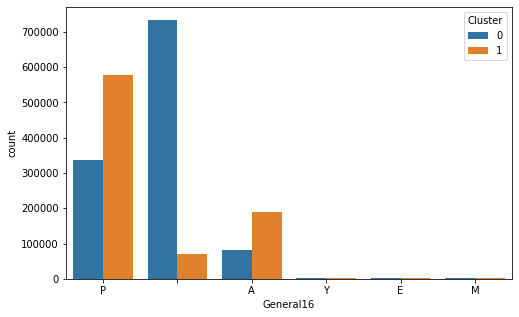

In [ ]:
plt.subplots(figsize = (8,5))
sns.countplot(x=dfMergedClusters_2['General16'],order=dfMergedClusters_2['General16'].value_counts().index,hue=dfMergedClusters_2['Cluster'])
plt.show()

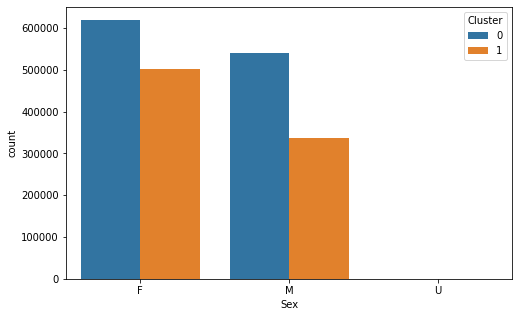

In [ ]:
plt.subplots(figsize = (8,5))
sns.countplot(x=dfMergedClusters_2['Sex'],order=dfMergedClusters_2['Sex'].value_counts().index,hue=dfMergedClusters_2['Cluster'])
plt.show()

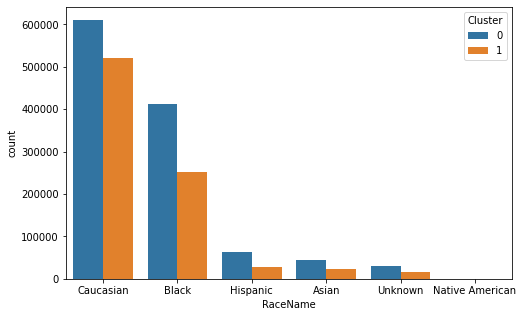

In [ ]:
plt.subplots(figsize = (8,5))
sns.countplot(x=dfMergedClusters_2['RaceName'],order=dfMergedClusters_2['RaceName'].value_counts().index,hue=dfMergedClusters_2['Cluster'])
plt.show()

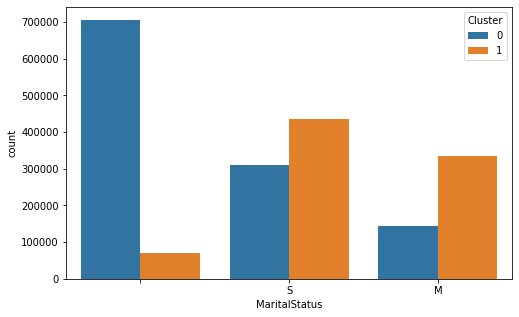

In [ ]:
plt.subplots(figsize = (8,5))
sns.countplot(x=dfMergedClusters_2['MaritalStatus'],order=dfMergedClusters_2['MaritalStatus'].value_counts().index,hue=dfMergedClusters_2['Cluster'])
plt.show()

In [ ]:
print(kmode_2.cluster_centroids_)

[['F' 'Caucasian' '' 'U' '48219.0' '' '' '' '' '' '' '' '' '' '' '' '']
 ['F' 'Caucasian' 'S' 'U' '48237.0' '' '' 'P' '' '' 'P' '' '' 'P' '' ''
  'A']]


#Encoding categorical variables for PCA/K-means

In [ ]:
dfEncoded = dfMerged.copy()
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()
# transform data
dfEncoded = dfEncoded.apply(le.fit_transform)

dfEncoded.head()

,Sex,RaceName,MaritalStatus,Party,mZip5,PresPrimary08,PresPrimary08Party,General08,PresPrimary12,PresPrimary12Party,General12,PresPrimary16,PresPrimary16Party,General16,PresPrimary20,PresPrimary20Party,General20
354414,0,1,2,8,4610,0,0,0,0,0,0,0,0,0,0,0,0
1797018,0,1,0,0,5094,0,0,0,0,0,0,0,0,4,0,0,0
225294,0,2,2,8,4818,0,0,0,0,0,0,0,0,0,0,0,0
630318,1,1,0,8,4477,0,0,0,0,0,0,0,0,4,0,0,0
1947309,0,1,0,8,4439,0,0,0,0,0,0,0,0,4,4,0,8181


###PCA

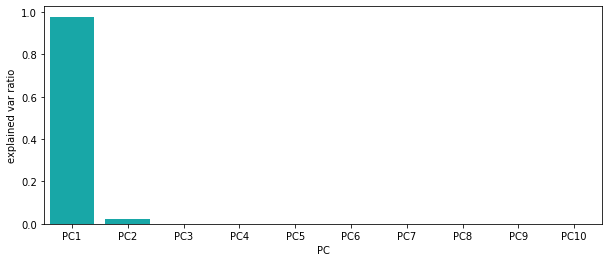

0    0.978152
1    0.999997
2    0.999998
3    0.999999
4    0.999999
5    0.999999
6    0.999999
7    0.999999
8    1.000000
9    1.000000
Name: explained var ratio, dtype: float64

In [ ]:
# run PCA on the entire normalized, averaged dataset to find the first 20 principal components
pca = PCA(n_components = 10).fit(dfEncoded)
principalComponents = pca.transform(dfEncoded)

# variance plot to find optimal number of principal components
pca_df = pd.DataFrame({'explained var ratio':pca.explained_variance_ratio_,
                   'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']})
plt.figure(figsize=(10,4))
ax = sns.barplot(x = 'PC',y = "explained var ratio", data = pca_df, color="c")
plt.show()

np.cumsum(pca_df['explained var ratio'])

In [ ]:
pca = PCA(n_components = 2)
pca.fit(dfEncoded)
scores_pca = pca.transform(dfEncoded)

###K-means implementation

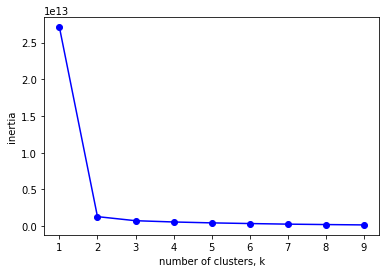

In [ ]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(scores_pca)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='blue')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
kmeans_pca = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
df_clusters = pd.concat([dfEncoded.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_clusters.columns.values[-2:] = ['Component 1', 'Component 2']
df_clusters['Cluster'] = kmeans_pca.labels_
df_clusters.head()

,Sex,RaceName,MaritalStatus,Party,mZip5,PresPrimary08,PresPrimary08Party,General08,PresPrimary12,PresPrimary12Party,General12,PresPrimary16,PresPrimary16Party,General16,PresPrimary20,PresPrimary20Party,General20,Component 1,Component 2,Cluster
0,0,1,2,6,3595,0,0,0,0,0,0,0,0,0,0,0,0,5229.049978,90.714472,1
1,0,1,0,0,4071,0,0,0,0,0,0,0,0,4,0,0,0,5225.695742,566.703834,1
2,0,2,2,6,3801,0,0,0,0,0,0,0,0,0,0,0,0,5227.598710,296.709522,1
3,1,1,0,6,3463,0,0,0,0,0,0,0,0,4,0,0,0,5229.979092,-41.281727,1
4,0,1,0,6,3425,0,0,0,0,0,0,0,0,4,4,0,7491,-2260.567477,-132.053987,0


##K-means clusters by PCA components

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


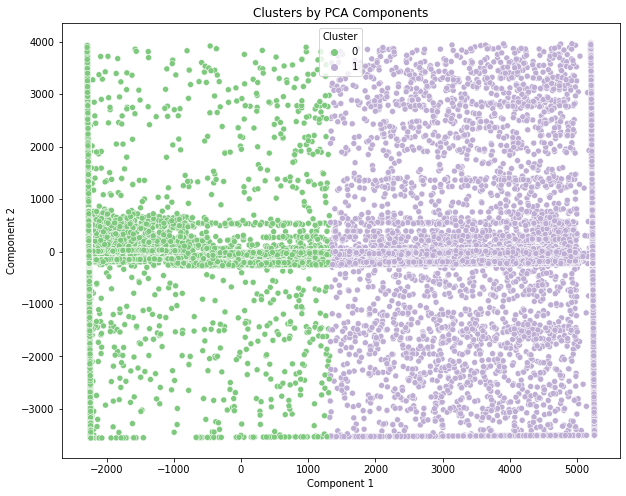

In [ ]:
x_axis = df_clusters['Component 1']
y_axis = df_clusters['Component 2']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_clusters['Cluster'], palette = 'Accent')
plt.title('Clusters by PCA Components')
plt.show()

##DBSCAN implementation

In [ ]:
sample = dfEncoded.sample(frac=0.05, random_state=1)

knn = NearestNeighbors(1)
knn.fit(sample) 

distances, indices = knn.kneighbors()
distances = np.sqrt(distances)

print(np.median(distances))

1.0


In [ ]:
# Conducting DBSCAN Clustering
clt = DBSCAN(eps = 88, min_samples = 5)

# Predicting clusters
clusters = pd.DataFrame(clt.fit_predict(scores_pca))
df_clusters = pd.concat([df_clusters.reset_index(drop=True), clusters], axis=1)
df_clusters['DBSCAN'] = clusters

# Visualise cluster membership
x_axis = df_clusters['Component 1']
y_axis = df_clusters['Component 2']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_clusters['DBSCAN'])
plt.title('DBSCAN Clusters by PCA Components')
plt.show()